In [25]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [30]:
# generators

train_ds = keras.utils.image_dataset_from_directory(
    directory='Data/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='Data/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [31]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [32]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [34]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10


625/625 [==============================] - 1221s 2s/step - loss: 0.6067 - accuracy: 0.6784 - val_loss: 0.7537 - val_accuracy: 0.5708
Epoch 2/10
625/625 [==============================] - 1196s 2s/step - loss: 0.5612 - accuracy: 0.7297 - val_loss: 0.6063 - val_accuracy: 0.6806
Epoch 3/10
625/625 [==============================] - 1193s 2s/step - loss: 0.4698 - accuracy: 0.7818 - val_loss: 0.4466 - val_accuracy: 0.7922
Epoch 4/10
625/625 [==============================] - 1199s 2s/step - loss: 0.4084 - accuracy: 0.8133 - val_loss: 0.5194 - val_accuracy: 0.7634
Epoch 5/10
625/625 [==============================] - 1151s 2s/step - loss: 0.3486 - accuracy: 0.8507 - val_loss: 0.4476 - val_accuracy: 0.7898
Epoch 6/10
625/625 [==============================] - 1193s 2s/step - loss: 0.2701 - accuracy: 0.8881 - val_loss: 0.5843 - val_accuracy: 0.7636
Epoch 7/10
625/625 [==============================] - 1192s 2s/step - loss: 0.2033 - accuracy: 0.9209 - val_loss: 0.6193 - val_accuracy: 0.7856
Epo

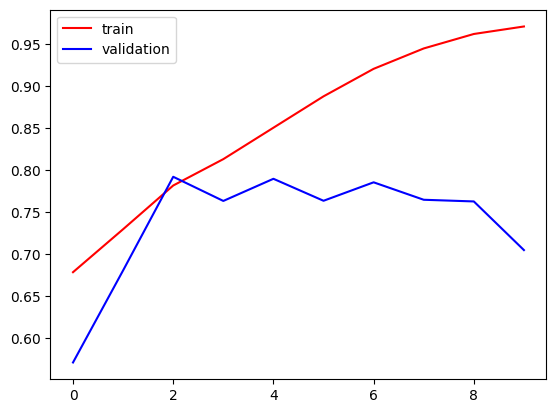

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()

plt.show()

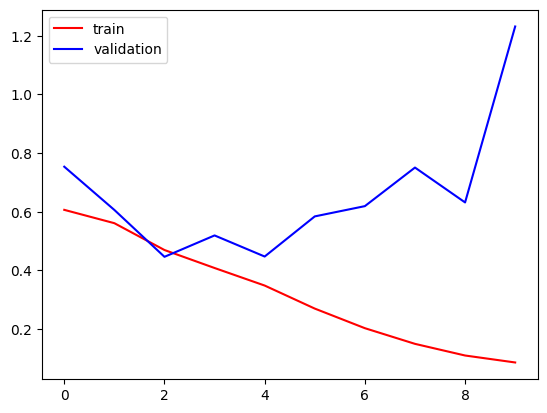

In [39]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()

plt.show()

In [41]:
import cv2

In [81]:
def prediksi(data):
    test_img1 = cv2.imread(data)
    test_img1.shape
    test_img1 = cv2.resize(test_img1,(256,256))
    test_input1 = test_img1.reshape((1,256,256,3))
    kk = model.predict(test_input1)
    if(kk[0] == 0):
        print("kucing")
    elif(kk[0] == 1):
        print("Anjing")
    else:
        print("entah")

In [82]:
data = 'Data/cat.34.jpg'
prediksi(data)

1/1 [==============================] - 0s 88ms/step
kucing


In [83]:
data = 'Data/dog.56.jpg'
prediksi(data)

1/1 [==============================] - 0s 68ms/step
Anjing


In [85]:
data = 'Data/dog.452.jpg'
prediksi(data)

1/1 [==============================] - 0s 88ms/step
Anjing


In [88]:
data = 'Data/cat.660.jpg'
prediksi(data)

1/1 [==============================] - 0s 74ms/step
kucing
